In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

sns.set_theme()

data = pd.read_csv("Gender Classification.csv") # Reading in the Gender Classification dataset

## Data
It is important to note that for this model, the dataset was modified to cleary separate the genders. More specifically, the gender column in the dataset was sorted alphabetically in order to easily focus on the attributes of each gender. The first 2502 rows are stricly female while the remaining rows are males. 

Lets take a look at the data.

In [7]:
data 

,long_hair,Forehead Width (cm),Forehead Height (cm),nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
0,0,14.0,5.4,0,0,1,0,Female
1,1,13.5,5.9,0,0,0,0,Female
2,0,13.0,5.2,0,0,0,0,Female
3,1,11.9,5.4,1,0,1,1,Female
4,1,12.1,5.4,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,12.1,6.2,1,1,1,1,Male
4997,1,14.1,7.0,1,1,1,1,Male
4998,1,12.9,7.0,1,1,1,1,Male
4999,1,12.3,6.9,0,1,1,1,Male


-------------------------------------------------------------------------------------------------------------------------------------------------
We will begin by instantiating a variable for the each genders forehead width and height attributes. For instance, the variable "female_w" will contain the forehead width measurement of the first 100 rows, which are all female. Similarly, "female_h" will contain all the forehead height measurments of the first 100 rows as well. The same will be done with the males, which begins at the 2503 row of the sorted dataset; however, for simplicity we will use the last 100 rows of the dataset, which are all male.  

In [80]:
female_w = data.iloc[:100]["Forehead Width (cm)"] # storing the width feature measurement of the first 100 rows (females)
female_h = data.iloc[:100]["Forehead Height (cm)"] # storing the height feature measurement of the first 100 rows (females)

male_w = data.tail(100)["Forehead Width (cm)"]    # storing the width feature measurement of the last 100 rows (males)
male_h= data.tail(100)["Forehead Height (cm)"]    # storing the height feature measurement of the last 100 rows (males)

Lets see a visualization of the data -- more specifically, lets see the genders as a function of forehead width and height. 

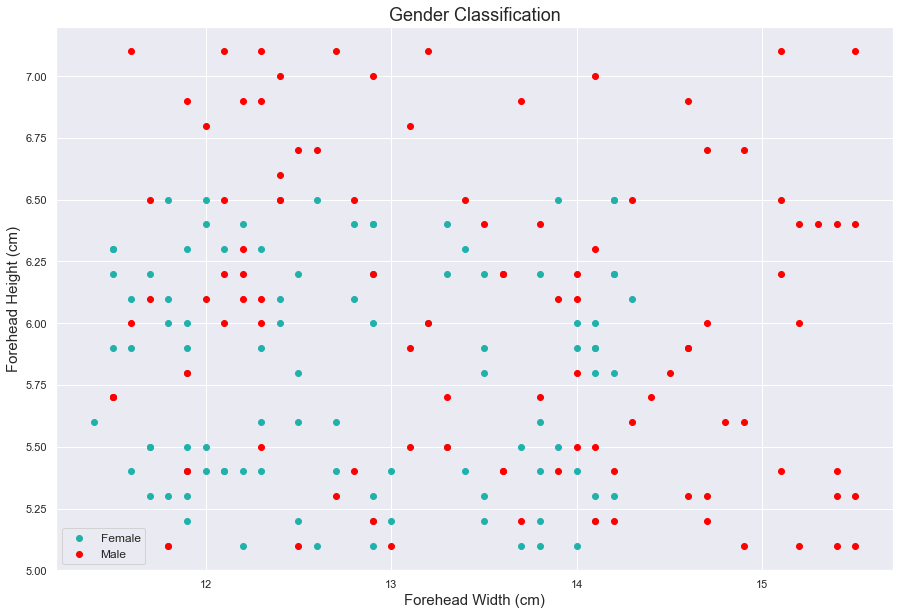

In [81]:
plt.figure(figsize = (15, 10))
plt.scatter(female_w,
            female_h,
            color = "lightseagreen",
            label = "Female")
plt.scatter(male_w,
            male_h,
            color = "red",
            label = "Male")        
plt.xlabel("Forehead Width (cm)", fontsize = 15)
plt.ylabel("Forehead Height (cm)", fontsize = 15)
plt.legend(fontsize = 12)
plt.title("Gender Classification", fontsize = 18)
plt.show()

As we can see above, this data is non-linearly separable -- that is, the males and females cannot be split by a linear funciton -- because both genders overlap in the same region. 

However, it is important to notice that the probability of selecting a female is higher than a male whenever the forehead width is less than 14 and forehead height is less than 6.5. This is because most of the female data points are within this region while the male data points are scattered both within and outside of this region. Moreover, the probability of selecting a male over a female is almost certain whenever forehead width is greater than ~14.3 and the forehead height is higher than 6.50.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Now, we will label (y) each female by 0 and each male by 1. Then, we will observe the forehead width as the feature measurement (x).


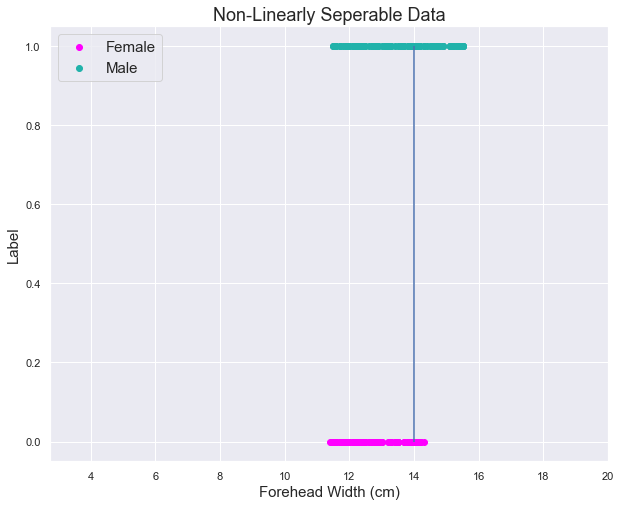

In [95]:
plt.figure(figsize = (10, 8))
plt.xlim((2.75, 20))
plt.scatter(female_w, 
            np.zeros(100), 
            color = "magenta", 
            label = "Female")
plt.scatter(male_w, 
            np.ones(100), 
            color = "lightseagreen", 
            label = "Male")
plt.vlines(14, 0.0, 1.0)
plt.xlabel("Forehead Width (cm)", fontsize = 15)
plt.ylabel("Label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Similar to before, we will label (y) each female by 0 and each male by 1. But, this time we will observe the forehead height as the feature measurement (x).


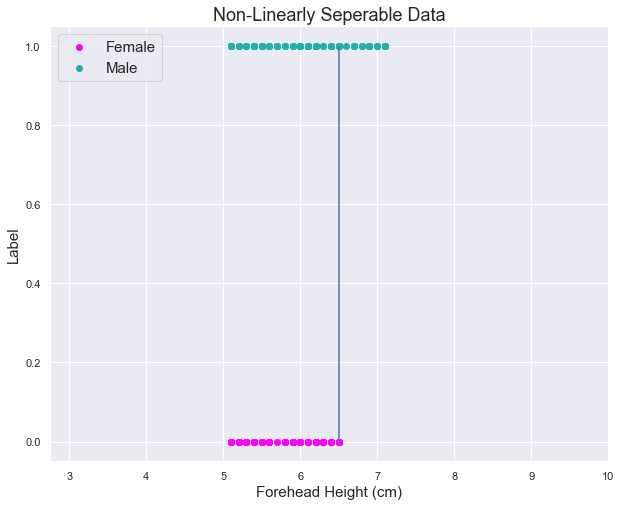

In [96]:
plt.figure(figsize = (10, 8))
plt.xlim((2.75, 10))
plt.scatter(female_h, 
            np.zeros(100), 
            color = "magenta", 
            label = "Female")
plt.scatter(male_h, 
            np.ones(100), 
            color = "lightseagreen", 
            label = "Male")
plt.vlines(6.5, 0.0, 1.0)
plt.xlabel("Forehead Height (cm)", fontsize = 15)
plt.ylabel("Label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

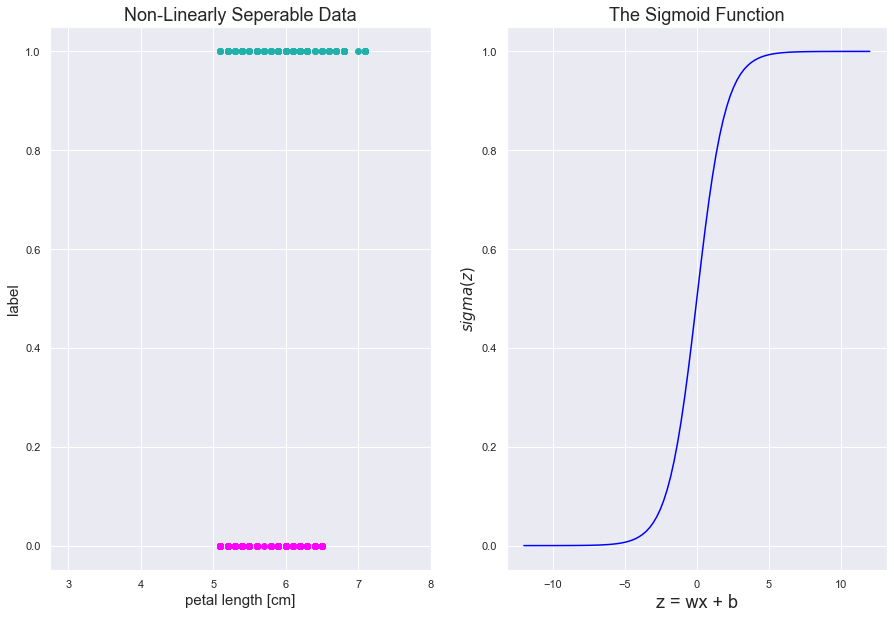

In [39]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((2.75, 8))
ax1.scatter(female_h, 
            np.zeros(100), 
            color = "magenta", 
            label = "versicolor")
ax1.scatter(male_h, 
            np.ones(100), 
            color = "lightseagreen", 
            label = "virginica")
ax1.set_xlabel("petal length [cm]", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

In [40]:
class Single_Neuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [44]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = Single_Neuron(sigmoid, cross_entropy_loss)
X = data["Forehead Height (cm)"].iloc[50:].values # Storing the desired feature measurements in the matrix X

X = X.reshape(-1, 1)
y = np.where(data.iloc[50:].Gender == "Female", 0, 1)

node.train(X, y, alpha = 0.01, epochs = 1_000)

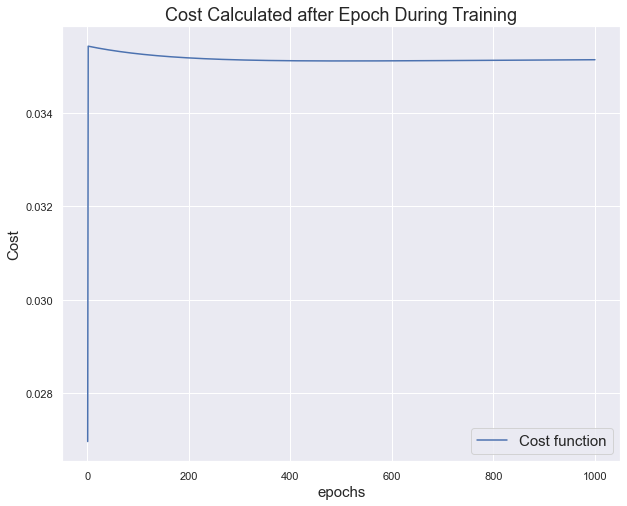

In [45]:
node.plot_cost_function()
plt.show()

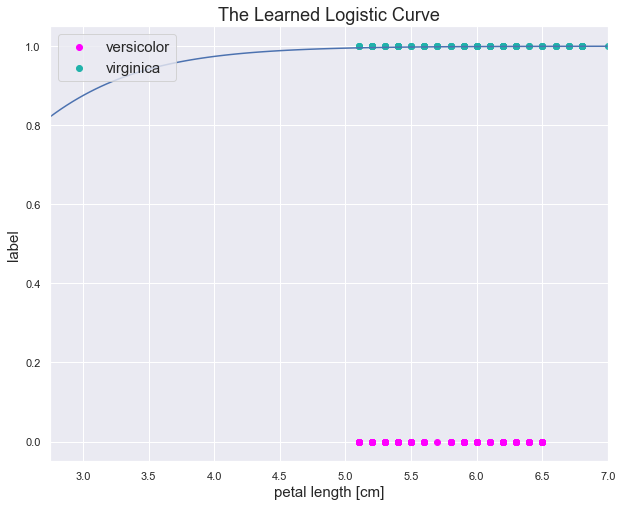

In [46]:
plt.figure(figsize = (10, 8))
plt.xlim((2.75, 7 ))
plt.scatter(female_h, 
            np.zeros(100), 
            color = "magenta", 
            label = "versicolor")
plt.scatter(male_h, 
            np.ones(100), 
            color = "lightseagreen", 
            label = "virginica")

domain = np.linspace(2.75, 7, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("petal length [cm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [47]:
node.predict(X)

array([0.99960211, 0.9978669 , 0.99934136, ..., 0.99982827, 0.99979684,
       0.99747743])

In [48]:
np.rint(node.predict(X)) != y

array([ True,  True,  True, ..., False, False, False])

In [49]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.4950515047465159


c:\Users\gonza\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


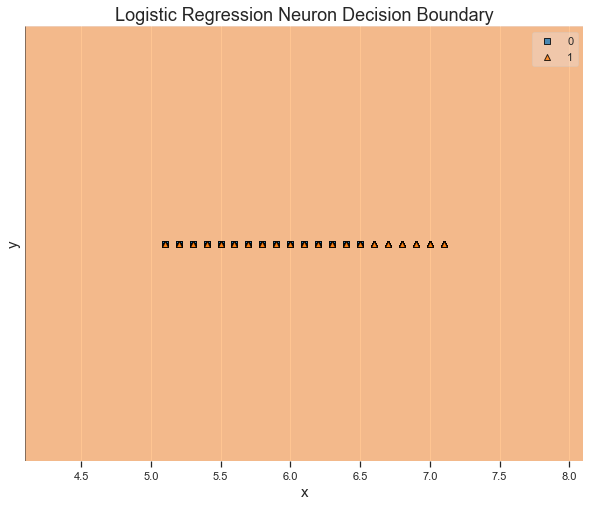

In [50]:
node.plot_decision_boundary(X, y)
plt.show()